# PROCEDURE

# 1.Importing Packages and Dataset

# 2.Exploring the Data

# 3.Preparing the Data

# 4.Custom Model

# 5.Transfer Learning

# 6.Performance and validation


# Introduction


There are three folders which contain normal and pneumonia chest X-rays.
The goal of this notebook is to use Convolutional Neural Networks on Chest X-Ray images to determine which samples are from patients with Pneumonia. In this dataset, there is one folder representing the train set and another one for the test set. The train folder is farther split in the notebook into train/validation sets.


# Importing Packages


In [2]:
# import os #provides functions for creating and removing a direrectory, fetching its contents, changing and identifying the current directory
# import random#imports the random module, which contains a variety of things to do with random number generation
# import glob# to define patterns for matching file and directory names
# import gc#exposes the underlying memory management mechanism
# import pandas as pd#ibrary of python used for data manipulation,loading  and analysis
# import numpy as np #performing mathematical and logical operations on Arrays
# import matplotlib.pyplot as plt#helps to plot graphs.
# import seaborn as sns#helps to plot graphs.
# from sklearn.model_selection import train_test_split#spliting data to training dataset and test dataset
# from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report #define the performance of a classification algorithm
# from sklearn.utils.class_weight import compute_class_weight #Estimate class weights for unbalanced datasets
# import tensorflow as tf #a program synthesis tool that helps you write TensorFlow code
# from tensorflow.keras.utils import image_dataset_from_directory
# from keras.preprocessing.image import ImageDataGenerator #alllow one to randomly rotate images through any degree between 0 and 360
# from keras.preprocessing.image import load_img #for loading an image from file as a PIL image object
# from keras.models import * #for developing and evaluating deep learning models.
# from keras.layers import * #building blocks of neural networks in Keras i.e flatten layer,dense layer
# from keras.callbacks import * #object that can perform actions at various stages of training
# from tensorflow.keras.optimizers import Adam #used for optimization solver for the Neural Network algorithm
# from tensorflow.keras.applications.densenet import preprocess_input # adequate your image to the format the model requires.
# from keras.applications.vgg16 import VGG16 #no of layers with trainable weights which were already trained(transfer learning)

#corrections
import os  # Provides functions for creating and removing a directory, fetching its contents, changing, and identifying the current directory
import random  # Imports the random module, which contains a variety of things to do with random number generation
import glob  # To define patterns for matching file and directory names
import gc  # Exposes the underlying memory management mechanism
import pandas as pd  # Library of Python used for data manipulation, loading, and analysis
import numpy as np  # Performing mathematical and logical operations on Arrays
import matplotlib.pyplot as plt  # Helps to plot graphs
import seaborn as sns  # Helps to plot graphs
from sklearn.model_selection import train_test_split  # Splitting data to training dataset and test dataset
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report  # Define the performance of a classification algorithm
from sklearn.utils.class_weight import compute_class_weight  # Estimate class weights for unbalanced datasets
import tensorflow as tf  # A program synthesis tool that helps you write TensorFlow code
from tensorflow.keras.utils import image_dataset_from_directory  # For creating datasets from directories of images
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Allow one to randomly rotate images through any degree between 0 and 360
from tensorflow.keras.preprocessing.image import load_img  # For loading an image from file as a PIL image object
from tensorflow.keras.models import *  # For developing and evaluating deep learning models
from tensorflow.keras.layers import *  # Building blocks of neural networks in Keras, i.e., flatten layer, dense layer
from tensorflow.keras.callbacks import *  # Object that can perform actions at various stages of training
from tensorflow.keras.optimizers import Adam  # Used for optimization solver for the Neural Network algorithm
from tensorflow.keras.applications.densenet import preprocess_input  # Adequate your image to the format the model requires
from tensorflow.keras.applications.vgg16 import VGG16  # No of layers with trainable weights which were already trained (transfer learning)


In [2]:
!pip install keras

In [3]:
import warnings # provided to warn the developer of situations that aren't necessarily exceptions
warnings.filterwarnings("ignore")

In [4]:
BATCH_SIZE = 32 #number of training examples utilized in one iteration $ processed before the model is updated

SEED = 42 #used to ensure that results are reproducible that is; anyone who re-runs your code will get the exact same accuracy or results


# Loading Datasets


In [6]:
!pip install google.colab

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/11.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/11.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/11.8 MB ? eta -:--:--
      --------------------------------------- 0.3/11.8 MB ? eta -:--:--
      --------------------------------------- 0.3/11.8 MB ? eta -:--:--
     - ------------------------------------- 0.5/11.8 MB 578.7 kB/s eta 0:00:20
     -- ------------------------------------ 0.8/11.8 MB 645.7 kB/s eta 0:00:18
     -- ------------------------------------ 0.8/11.8 MB 645.7 kB/s eta 0:00:18
     --- ----------------------------------- 1.0/11.8 MB 680.3 kB/s eta 0:00:16
     --- ----------------------------------- 1.0/11.8 MB 680.3 kB/s eta 0:00:16
     ---- ---------------------------------- 1.3/11.8 MB 684.9 kB/s eta 0:00:16
     ---- ---------------------------------- 1.3/11.8 MB 6

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      C:\Users\unknown\AppData\Local\Temp\pip-install-gz5p6ffp\pandas_803849e21c82478f809c5b03e69d6020\setup.py:12: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
        import pkg_resources
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\unknown\AppData\Local\Temp\pip-install-gz5p6ffp\pandas_803849e21c82478f809c5b03e69d6020\setup.py", line 732, in <module>
          version=versioneer.get_version(),
                  ^^^^^^^^^^^^^^^^^^^^^^^^
        File "C:\Users\unknown\AppData\Local\Temp\pip-install-gz5p6ffp\pandas_803849e21c82478f809c5b03e69d6020\versioneer.py", line 1409, in get_version
          return get_versions()["version"]
                 ^^^^^

In [7]:
from google.colab import drive #Importing data from google drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
TRAIN_PATH = "drive/MyDrive/Colab Notebooks/chest_xray/train" #folder that contain our training data
VAL_PATH = "drive/MyDrive/Colab Notebooks/chest_xray/val" #folder that contain our validation data
TEST_PATH = "drive/MyDrive/Colab Notebooks/chest_xray/test" #folder that contain our test  data

In [ ]:
print(f"Normal X-Rays images in training set: {len(os.listdir(VAL_PATH + '/NORMAL'))} ")#checking normal images

print(f"Pneumonia X-Rays From Validation Set: {len(os.listdir(VAL_PATH + '/PNEUMONIA'))} ")#checking images with pneumonia

Normal X-Rays images in training set: 9 
Pneumonia X-Rays From Validation Set: 9 


In [ ]:

train_normal = pd.DataFrame({"path": os.listdir(TRAIN_PATH + "/NORMAL"), "label": "NORMAL"})#creating training dataframe for normal images folder
train_normal["path"] = train_normal["path"].apply(lambda x: TRAIN_PATH + "/NORMAL/" + x)
train_pneumonia = pd.DataFrame({"path": os.listdir(TRAIN_PATH + "/PNEUMONIA"), "label": "PNEUMONIA"})#creating training dataframe folder for images that contain pneumonia
train_pneumonia["path"] = train_pneumonia["path"].apply(lambda x: TRAIN_PATH + "/PNEUMONIA/" + x)

# concat = is used for linking things together
train_df = pd.concat([train_normal, train_pneumonia])

In [ ]:
val_normal = pd.DataFrame({"path": os.listdir(VAL_PATH + "/NORMAL"), "label": "NORMAL"})#creating validation dataframe for normal images folder
val_normal["path"] = val_normal["path"].apply(lambda x: VAL_PATH + "/NORMAL/" + x)
val_pneumonia = pd.DataFrame({"path": os.listdir(VAL_PATH + "/PNEUMONIA"), "label": "PNEUMONIA"})#creating validation dataframe folder for images that contain pneumonia
val_pneumonia["path"] = val_pneumonia["path"].apply(lambda x: VAL_PATH + "/PNEUMONIA/" + x)


val_df = pd.concat([val_normal, val_pneumonia])

In [ ]:
train_df.head()

path   label
0  drive/MyDrive/Colab Notebooks/chest_xray/train...  NORMAL
1  drive/MyDrive/Colab Notebooks/chest_xray/train...  NORMAL
2  drive/MyDrive/Colab Notebooks/chest_xray/train...  NORMAL
3  drive/MyDrive/Colab Notebooks/chest_xray/train...  NORMAL
4  drive/MyDrive/Colab Notebooks/chest_xray/train...  NORMAL

In [ ]:
train_df.shape

(5423, 2)

In [ ]:
train_data, val_data = train_test_split(train_df,
                                        test_size = 0.1,
                                        random_state = SEED,
                                        stratify = train_df["label"],
                                        shuffle = True)
#stratify = ensure that both the train and test sets have the proportion of examples in each class that is present in the provided train_df["label"]
val_data = pd.concat([val_df, val_data])

print(f"Training set size after re-splitting training data: {len(train_data)}")
print(f"Validation set size after re-splitting training data: {len(val_data)}")

Training set size after re-splitting training data: 4880
Validation set size after re-splitting training data: 561


# Exploring the Data and Visualizing Sample X-Rays


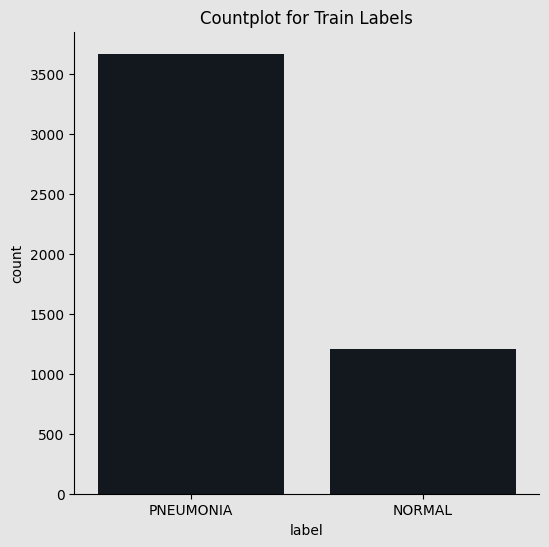

In [ ]:
# ax is the keyword for the part of the overall figure in which a chart/plot is drawn
fig, ax = plt.subplots(figsize = (6, 6), facecolor = "#e5e5e5") #face color used for specifying colrs
ax.set_facecolor("#e5e5e5")

sns.countplot(data = train_data, x = "label", ax = ax, color = "#101820")

ax.set_title("Countplot for Train Labels")
sns.despine() # despine = Remove the top and right spines from plot(s)
plt.show()

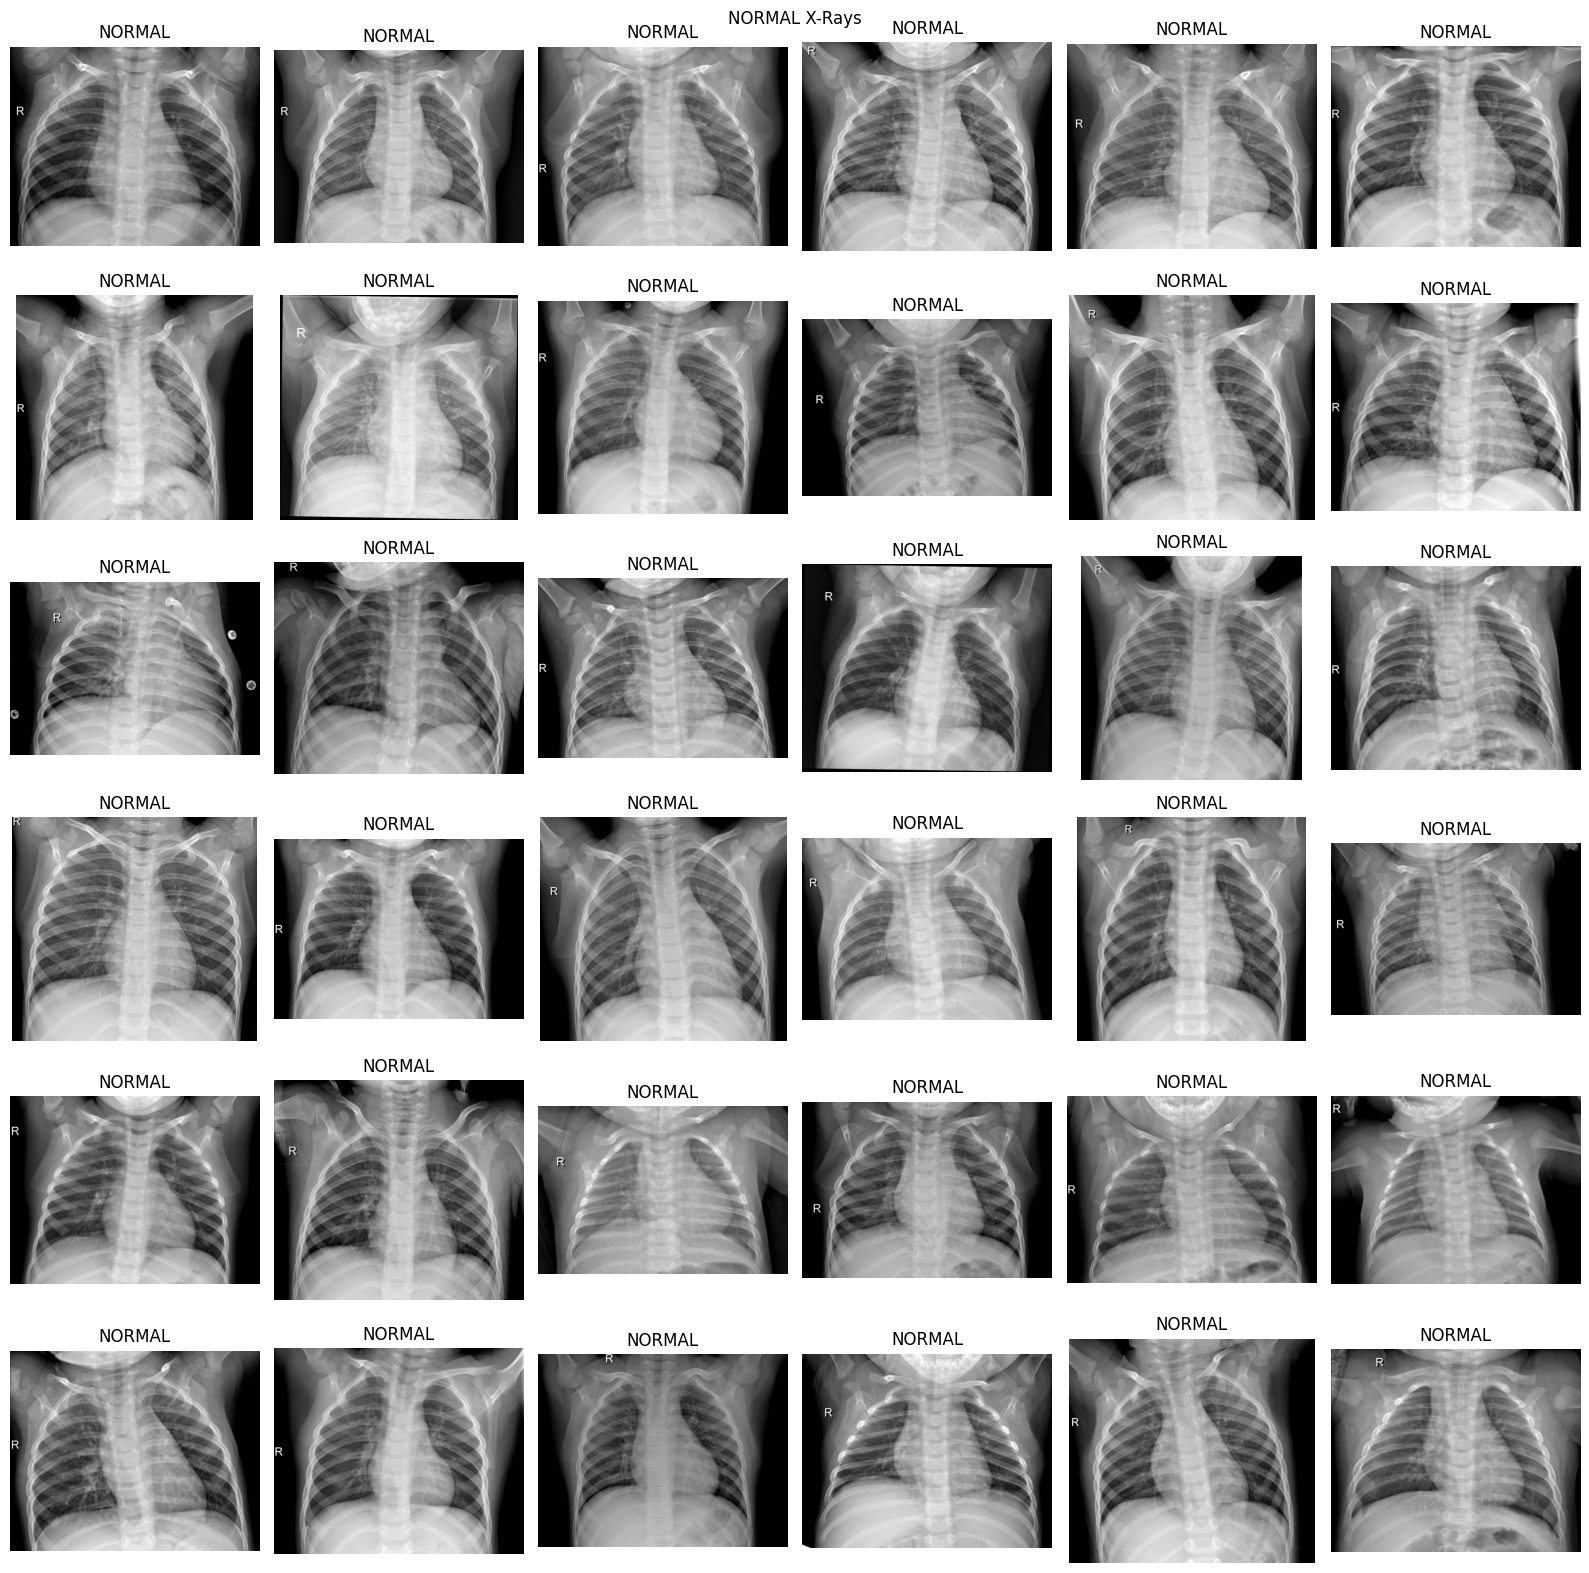

In [ ]:
#PLOTTING NORMAL  XRAY IMAGES, that's that does not contain pneumonia

# fig is the keyword for the part of the overall figure in which a chart/plot is drawn
fig = plt.figure(1, figsize = (16, 16))
fig.suptitle("NORMAL X-Rays")

#for loop -for i in range (36): you are saying that you want to count one by one from one number until you hit another.

for i in range(36):
    #random.randint () - to generate random numbers, which is randint().
    ind = random.randint(0, len(train_data.query("label == 'NORMAL'"))) #query ()- used to query the columns of a DataFrame with a boolean expression

    plt.subplot(6, 6, i + 1)
    image = load_img(train_data.query("label == 'NORMAL'").reset_index()["path"][ind]) #reset index drops the current index of the DataFrame
    plt.imshow(image)
    plt.title(train_data.query("label == 'NORMAL'").reset_index()["label"][ind])
    plt.axis("off")

plt.tight_layout()#used to automatically adjust subplot parameters to give specified padding
plt.show()

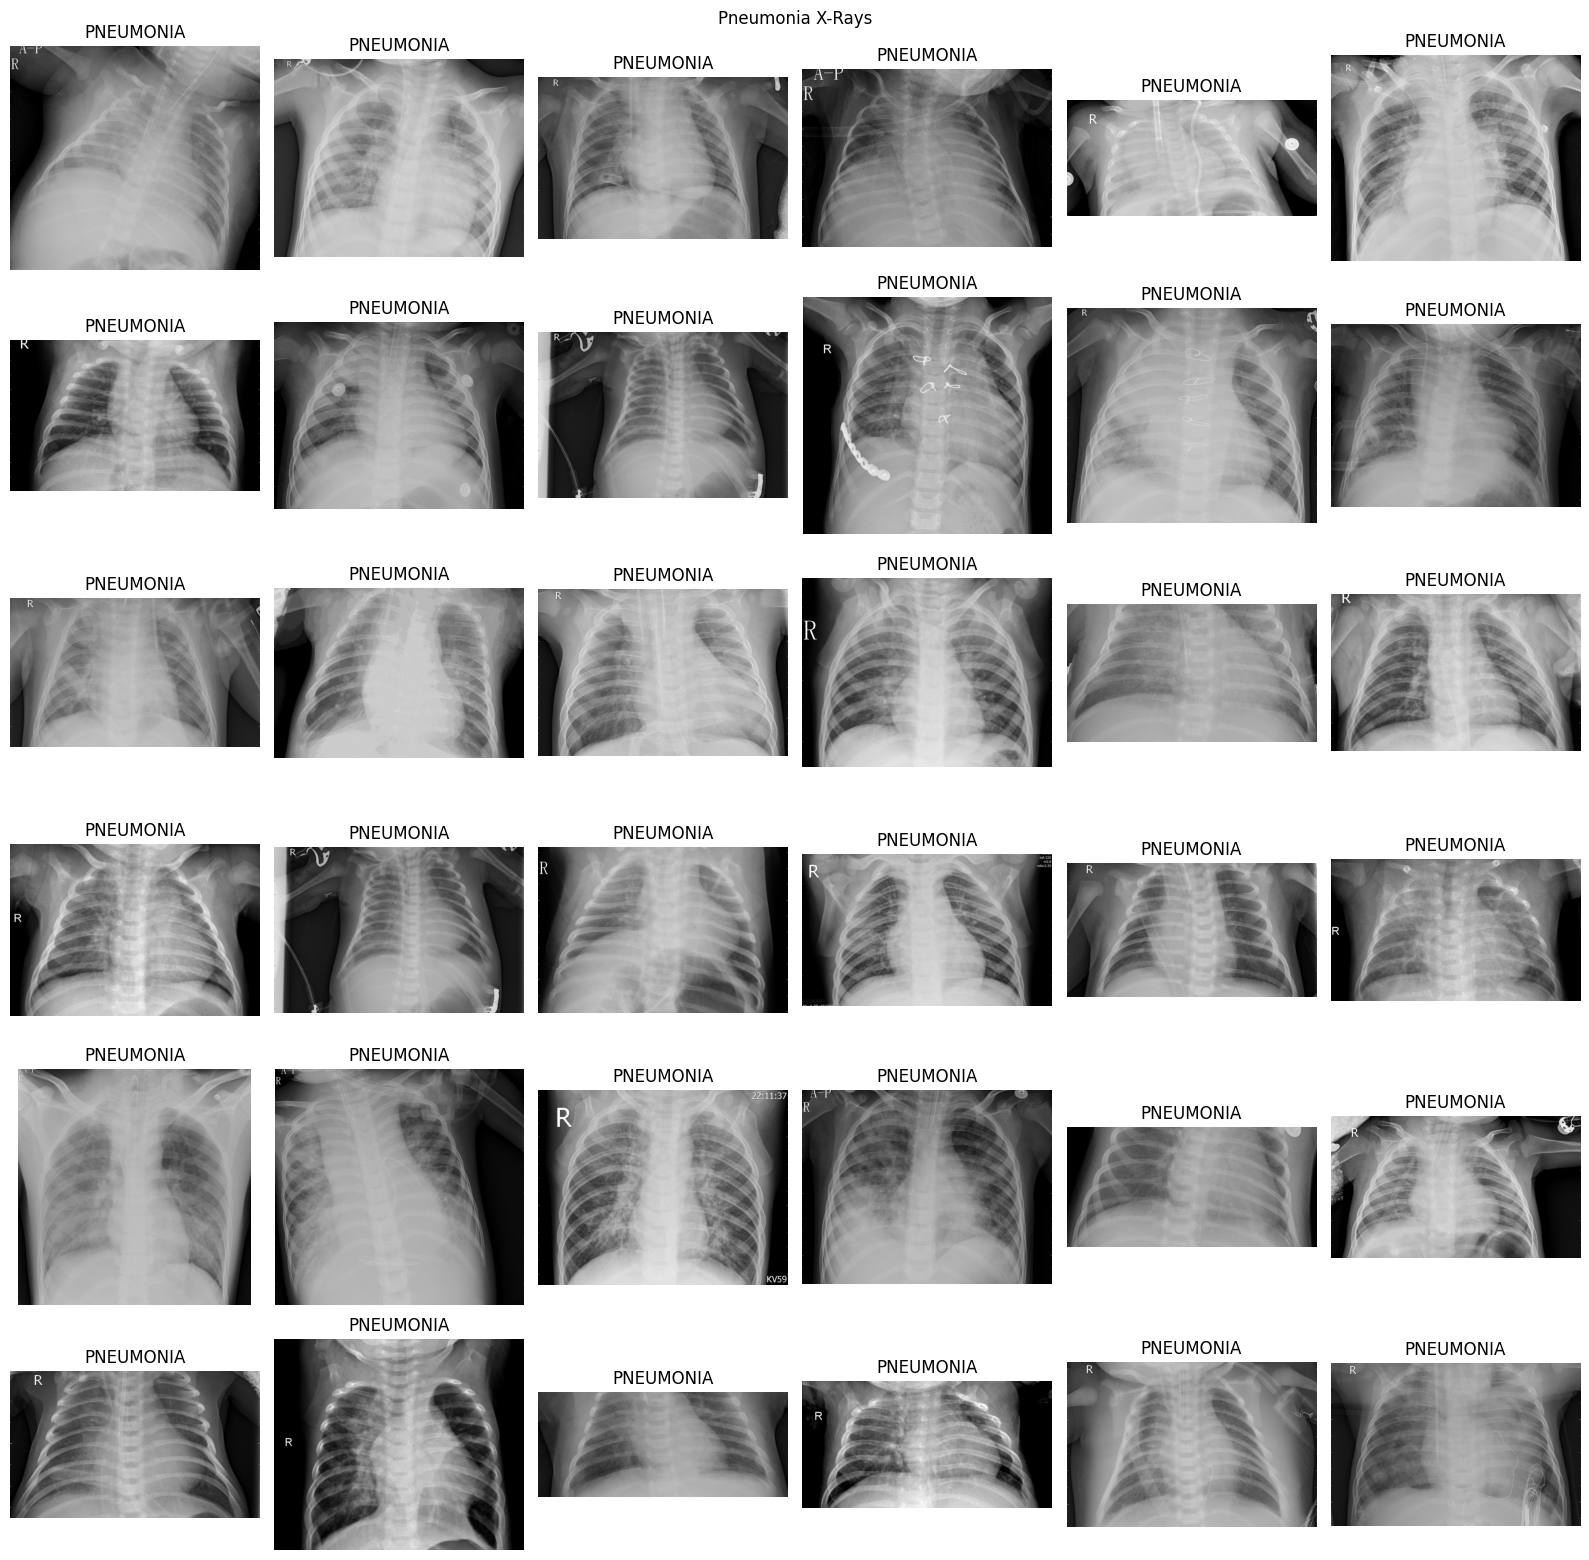

In [ ]:
#PLOTTING PNEUMONIA  XRAY IMAGES, that's which contain pneumonia
fig = plt.figure(1, figsize = (16, 16))
fig.suptitle("Pneumonia X-Rays")

for i in range(36):

    ind = random.randint(0, len(train_data.query("label == 'PNEUMONIA'"))) #used to query the columns of a DataFrame with a boolean expression

    plt.subplot(6, 6, i + 1)
    image = load_img(train_data.query("label == 'PNEUMONIA'").reset_index()["path"][ind])
    plt.imshow(image)
    plt.title(train_data.query("label == 'PNEUMONIA'").reset_index()["label"][ind])
    plt.axis("off")

plt.tight_layout()
plt.show()

# Data Augmentation


Found 1 validated image filenames belonging to 1 classes.


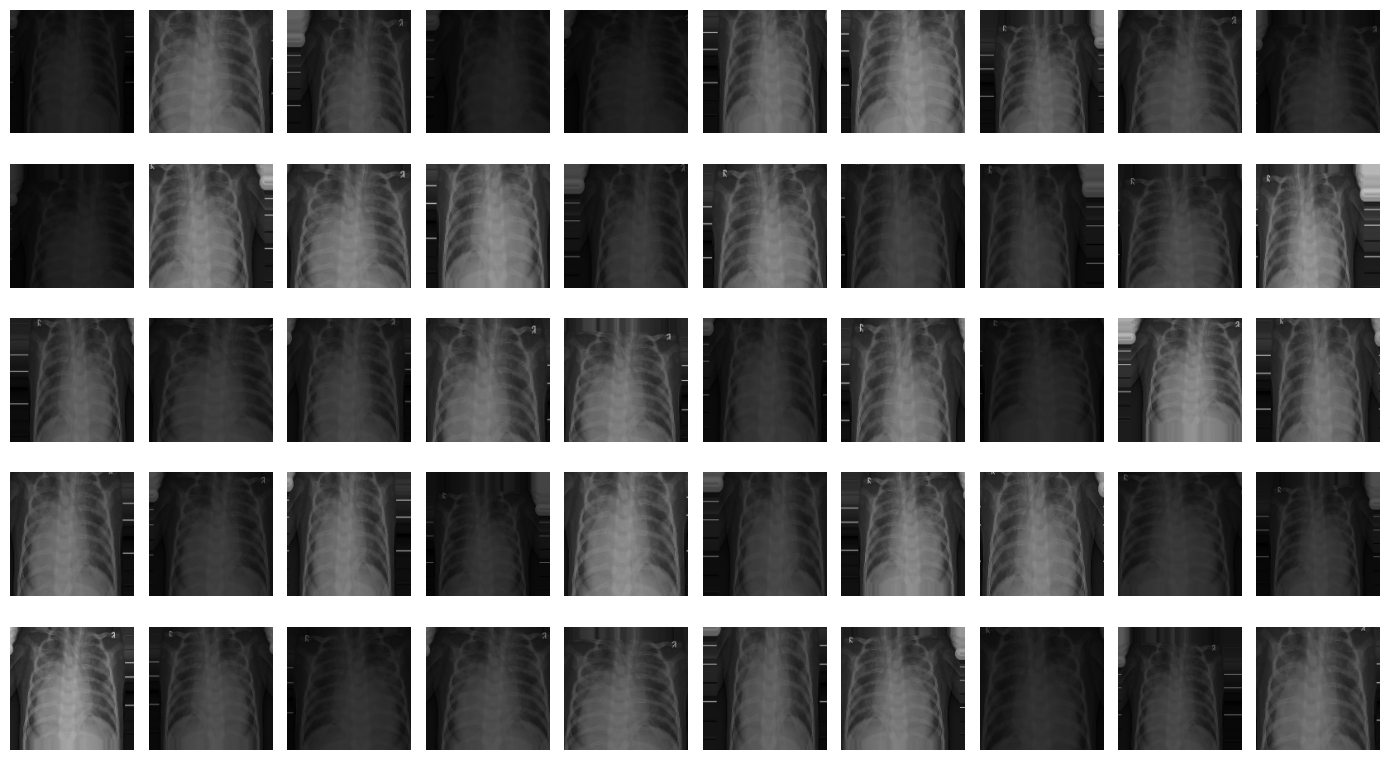

In [ ]:
#DATA AUGMENTATION = increase the image data size by transforming existing images through flip, rotation, crop and etC
datagen = ImageDataGenerator(
    brightness_range = (0.2, 1),
    zoom_range = 0.2,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = True,
    rescale = 1./255
)

sample_df = train_data.sample(1)

sample_generator = datagen.flow_from_dataframe(
    dataframe = sample_df,
    x_col = "path",
    y_col = "label",
    class_mode = "categorical",
    target_size = (150, 150),
    seed = 42
)

plt.figure(figsize = (14, 8))

for i in range(50):

    plt.subplot(5, 10, i + 1)

    for X, y in sample_generator:

        plt.imshow(X[0])
        plt.axis("off")
        break

plt.tight_layout()
plt.show()

# Data preparation


In [ ]:
train_datagen = ImageDataGenerator(
    brightness_range = (0.2, 1),
    zoom_range = 0.2,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = True,
    preprocessing_function = preprocess_input
)

val_datagen = ImageDataGenerator(
    preprocessing_function = preprocess_input
)

test_datagen = ImageDataGenerator(
    preprocessing_function = preprocess_input
)

In [ ]:
train_generator = train_datagen.flow_from_dataframe(
    dataframe = train_data,
    x_col = "path",
    y_col = "label",
    target_size = (150, 150),
    class_mode = "categorical",
    batch_size = BATCH_SIZE,
    shuffle = True,
    seed = SEED
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe = val_data,
    x_col = "path",
    y_col = "label",
    target_size = (150, 150),
    class_mode = "categorical",
    batch_size = BATCH_SIZE,
    shuffle = True,
    seed = SEED
)

test_generator = test_datagen.flow_from_directory(
    directory = TEST_PATH,
    target_size = (150, 150),
    class_mode = "categorical",
    batch_size = BATCH_SIZE,
    shuffle = False,
    seed = SEED
)

Found 4877 validated image filenames belonging to 2 classes.
Found 559 validated image filenames belonging to 2 classes.
Found 625 images belonging to 2 classes.


# Transfer Learning with DenseNet121 Model


In [ ]:
class_weights = compute_class_weight("balanced", classes = np.unique(train_data.label), y = train_data.label)

class_weights = {0: class_weights[0], 1: class_weights[1]}

In [ ]:
pre_trained_model = VGG16(include_top = False, weights = 'imagenet', input_shape = (150, 150, 3))


58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
pre_trained_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
#adding flatten layer and dense layer to enable predict our datset
x = pre_trained_model.output
x = Flatten()(x)

x = Dense(512, activation='relu')(x)

x = Dropout(0.5)(x) #technique used to prevent a model from overfitting

x = Dense(2, activation='softmax')(x) #scales numbers/logits into probabilities i.e probability if the image has pneumonia or normal

model = Model(pre_trained_model.input, x)

# Freezing pretrained layers,to ensure we don't train them again since they were already trained to save on the computation cost and memory
for layer in pre_trained_model.layers:
    layer.trainable=False



In [ ]:
optimizer=Adam()
model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:

model.summary() #provides a way to summarize a model to check parameters used

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
# Reduce learning rate when a metric has stopped improving.

reduce_lr = ReduceLROnPlateau(
    monitor = "val_loss",
    patience = 2,
    verbose = 1,
    factor = 0.3,
    min_lr = 0.000000001,
    cooldown = 1
)

In [ ]:
# stop training once the model performance stops improving
early_stopping = EarlyStopping(
    monitor = "val_loss",
    patience = 10,
    verbose = 1,
    mode = "max",
)

In [ ]:
# Saving the best model
checkpoint = ModelCheckpoint(
    monitor = "val_loss",
    filepath = "drive/MyDrive/pneumonia/pneumonia_vgg16.{epoch:02d}-{val_loss:.6f}.hdf5",#saving weights from different epochs that is from 1 to 10 and then pick which has the least loss
    verbose = 1,
    save_best_only = True,
    save_weights_only = True
)

In [ ]:
history = model.fit(
    train_generator,#template code generation surpassing the different stages of data loading, preprocessing, model development, hyperparameter setting, and declaring other such constraints for complete model building
    epochs = 10, #the number of epochs is the number of complete passes through the training dataset
    batch_size = BATCH_SIZE,
    validation_data = val_generator,
    validation_steps = val_data.shape[0] // BATCH_SIZE,
    steps_per_epoch = train_data.shape[0] // BATCH_SIZE,
    callbacks = [reduce_lr, early_stopping, checkpoint],#callback is an perform actions at various stages of training (e.g. at the start or end of an epoch)
    class_weight = class_weights
)

Epoch 1/10
152/152 [==============================] - ETA: 0s - loss: 0.2928 - accuracy: 0.8958 
Epoch 1: val_loss improved from inf to 0.29492, saving model to drive/MyDrive/pneumonia/pneumonia_vgg16.01-0.294922.hdf5
152/152 [==============================] - 2154s 14s/step - loss: 0.2928 - accuracy: 0.8958 - val_loss: 0.2949 - val_accuracy: 0.8824 - lr: 0.0010
Epoch 2/10
152/152 [==============================] - ETA: 0s - loss: 0.1995 - accuracy: 0.9247
Epoch 2: val_loss improved from 0.29492 to 0.11947, saving model to drive/MyDrive/pneumonia/pneumonia_vgg16.02-0.119470.hdf5
152/152 [==============================] - 1649s 11s/step - loss: 0.1995 - accuracy: 0.9247 - val_loss: 0.1195 - val_accuracy: 0.9504 - lr: 0.0010
Epoch 3/10
152/152 [==============================] - ETA: 0s - loss: 0.1876 - accuracy: 0.9273
Epoch 3: val_loss did not improve from 0.11947
152/152 [==============================] - 1656s 11s/step - loss: 0.1876 - accuracy: 0.9273 - val_loss: 0.2825 - val_accurac

In [ ]:
tf.keras.backend.clear_session() #Resets all state generated by Keras

model.load_weights("drive/MyDrive/pneumonia/pneumonia_vgg16.02-0.119470.hdf5") #loading the weight with least loss and in this case wa the lass epoch, the tenth one with a loss of 0.198567

# Monitor Loss using Learning Curves


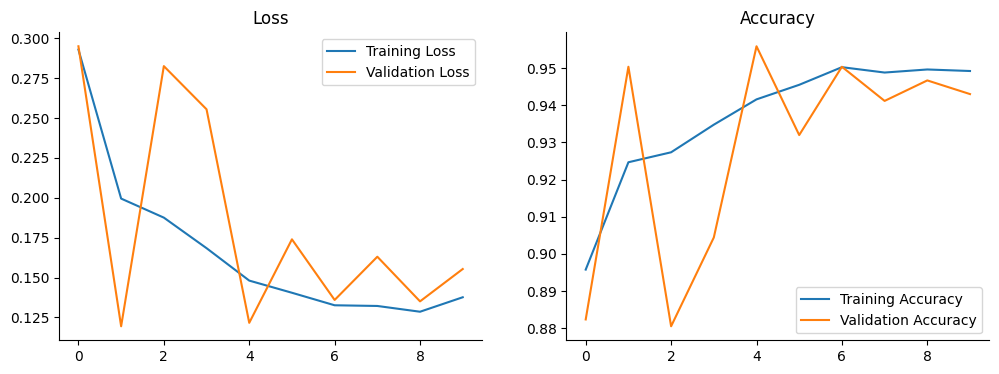

In [ ]:
#PLOTTING LEARNING CURVES

# Learning curves  plot of model learning performance over experience or time

fig, axes = plt.subplots(1, 2, figsize = (12, 4))

sns.lineplot(x = range(len(history.history["loss"])), y = history.history["loss"], ax = axes[0], label = "Training Loss")
sns.lineplot(x = range(len(history.history["loss"])), y = history.history["val_loss"], ax = axes[0], label = "Validation Loss")

sns.lineplot(x = range(len(history.history["accuracy"])), y = history.history["accuracy"], ax = axes[1], label = "Training Accuracy")
sns.lineplot(x = range(len(history.history["accuracy"])), y = history.history["val_accuracy"], ax = axes[1], label = "Validation Accuracy")
axes[0].set_title("Loss"); axes[1].set_title("Accuracy")

sns.despine()
plt.show()

# Test Set Performance


In [ ]:
test_normal = pd.DataFrame({"path": os.listdir(TEST_PATH + "/NORMAL"), "label": "NORMAL"})
test_normal["path"] = test_normal["path"].apply(lambda x: TEST_PATH + "/NORMAL/" + x)
test_pneumonia = pd.DataFrame({"path": os.listdir(TEST_PATH + "/PNEUMONIA"), "label": "PNEUMONIA"})
test_pneumonia["path"] = test_pneumonia["path"].apply(lambda x: TEST_PATH + "/PNEUMONIA/" + x)

test_df = pd.concat([test_normal, test_pneumonia])

In [ ]:
test_generator = test_datagen.flow_from_dataframe(
    dataframe = test_df,
    x_col = "path",
    y_col = "label",
    target_size = (150, 150),
    class_mode = "categorical",
    batch_size = 32,
    shuffle = False,
    seed = SEED
)

Found 625 validated image filenames belonging to 2 classes.


In [ ]:
test_pred = model.predict(test_generator) #predicting our validation data and see how the model performed
test_df.loc[:, "test_pred"] = np.argmax(test_pred, axis = 1)
# dictionary an unordered collection of data values
labels = dict((v, k) for k, v in test_generator.class_indices.items())

test_df.loc[:, "test_pred"] = test_df.loc[:, "test_pred"].map(labels)

20/20 [==============================] - 254s 13s/step


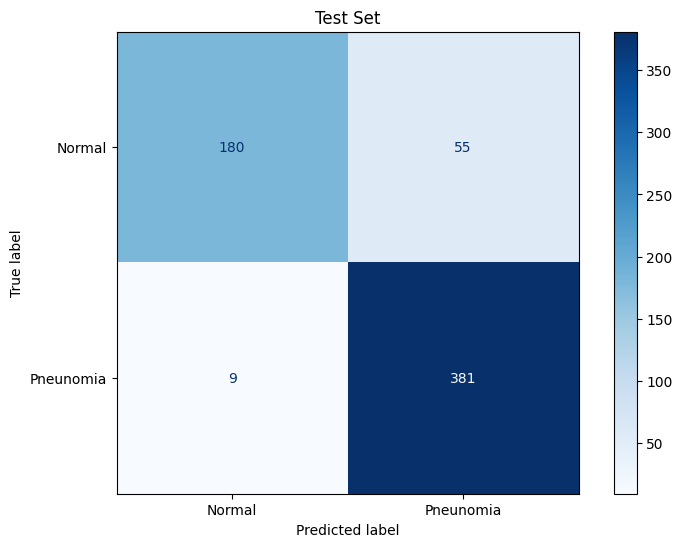

In [ ]:
#PLOTTING CONFUSION MATRIX
#Displaying a confussion matrix


fig, ax = plt.subplots(figsize = (9, 6))

cm = confusion_matrix(test_df["label"], test_df["test_pred"])

disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["Normal", "Pneunomia"])
disp.plot(cmap = plt.cm.Blues, ax = ax)

ax.set_title("Test Set")
plt.show()

In [ ]:
print(classification_report(test_df["label"], test_df["test_pred"]))

              precision    recall  f1-score   support

      NORMAL       0.95      0.77      0.85       235
   PNEUMONIA       0.87      0.98      0.92       390

    accuracy                           0.90       625
   macro avg       0.91      0.87      0.89       625
weighted avg       0.90      0.90      0.89       625



# Conclusion
